In [1]:
import os
import tarfile
from six.moves import urllib

### Fetch housing data

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

### Load housing data

In [5]:
import pandas as pd 

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [11]:
housing = load_housing_data()

### Quick glimpse at the housing data

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Histogram

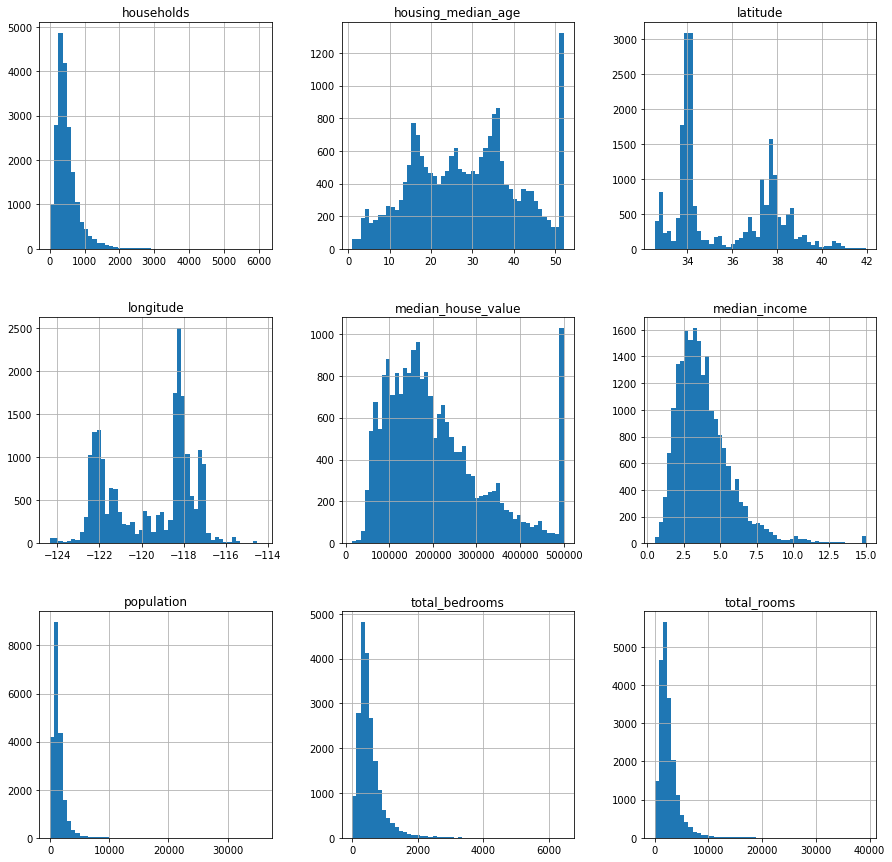

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(15, 15))
plt.show()

### Splitting the data

In [32]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

def strat_train_test(data, column_name, test_ratio, splits=1, state=42):
    split = StratifiedShuffleSplit(n_splits=splits, test_size=test_ratio, random_state=state)
    for train_indices, test_indices in split.split(data, data[column_name]):
        train = data.loc[train_indices]
        test = data.loc[test_indices]
    return train, test

#### Test Stratified Split

In [54]:
train, test = strat_train_test(data=housing, column_name='ocean_proximity', test_ratio=0.2)

print(test["ocean_proximity"].value_counts()/len(test), '\n')
print(housing["ocean_proximity"].value_counts()/len(housing))

<1H OCEAN     0.442587
INLAND        0.317345
NEAR OCEAN    0.128876
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64 

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64


In [56]:
housing = train.copy()

### Visualization 

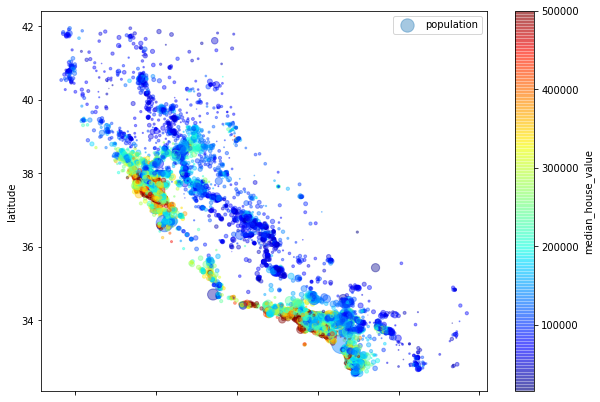

In [66]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha = 0.4, s=housing["population"]/100, label="population",
            figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True);

In [72]:
corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924775           -0.109436     0.041745   
latitude            -0.924775  1.000000            0.012785    -0.034101   
housing_median_age  -0.109436  0.012785            1.000000    -0.356687   
total_rooms          0.041745 -0.034101           -0.356687     1.000000   
total_bedrooms       0.068659 -0.066569           -0.314038     0.929975   
population           0.097978 -0.107614           -0.287994     0.854798   
households           0.054690 -0.070935           -0.296844     0.917670   
median_income       -0.014024 -0.081215           -0.122388     0.199985   
median_house_value  -0.040574 -0.150477            0.104590     0.135182   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068659    0.097978    0.054690      -0.014024   
latitude                 -0.066569   -0.107614   -0.070935      -0.081215   
housing_

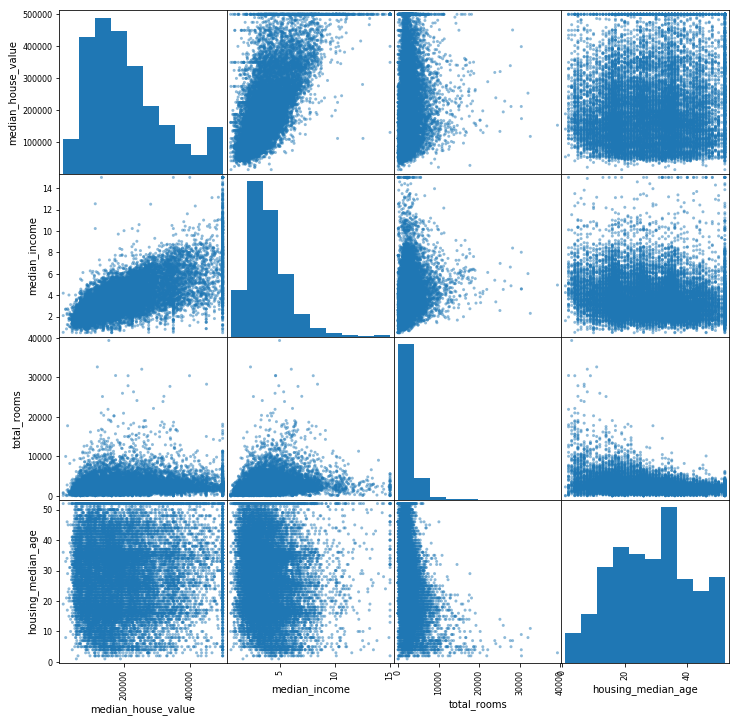

In [79]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,12));

#### Plotting most promising attribute 
Looking at the above scatter plots, it is clear that the median income is the most promising attribute when it comes to predicting the median house value.

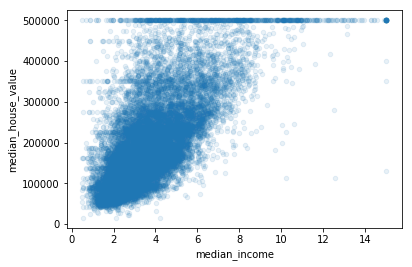

In [89]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

### Feature Engineering: Combining a few attributes
Some of the attributes lend themselves to combinations. For example, it stands to reason that knowing the number of bedrooms per household would give us information about the value of the residence. Similarly, knownledge of the bedroom to room ration is valuable too. Following that logic, we try to combine a few attributes and see how they correlate with the median house value.

In [118]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
print(corr_matrix["median_house_value"][["rooms_per_household", "bedrooms_per_room", "population_per_household"]])

rooms_per_household         0.149701
bedrooms_per_room          -0.249836
population_per_household   -0.033746
Name: median_house_value, dtype: float64


Looking at the correlation scores, we can see that rooms_per_household and bedrooms_per_room are indeed promising attributes.

### Cleaning Data

#### Filling in missing data

In [125]:
from sklearn.preprocessing import Imputer

housing_num = housing.drop("ocean_proximity", axis=1)

imputer = Imputer(strategy="median")
imputer.fit(housing_num)
print(imputer.statistics_)

[ -1.18500000e+02   3.42600000e+01   2.90000000e+01   2.11500000e+03
   4.33000000e+02   1.16100000e+03   4.09000000e+02   3.53130000e+00
   1.80400000e+05   5.22304925e+00   2.03419233e-01   2.81654090e+00]


In [127]:
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

#### Handling categorical attributes

In [140]:
housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()

from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder()
housing_cat_1hot = oh_enc.fit_transform(housing_cat_encoded.reshape(-1,1))


In [143]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

### Feature Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
housing_tr = sc.fit_transform(housing_tr)
housing_prepared = np.c_[housing_tr, housing_cat_1hot.toarray()]
housing_prepared.shape


(16512, 17)